In [85]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Source - https://www.kaggle.com/c/boston-housing
import pandas as pd
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

#Dataset Initialization
train_dataset = '~/Downloads/Machine-learning/Projects/Boston-Housing/train.csv'
df_train = pd.read_csv(train_dataset)
dfh = df_train.head()
train_Id = df_train.iloc[:,0]
inputs = df_train.iloc[:,1:14]
targets = df_train.iloc[:,14:15]

test_dataset = '~/Downloads/Machine-learning/Projects/Boston-Housing/test.csv'
df_test = pd.read_csv(test_dataset)
test_inputs = df_test.iloc[:,1:14]
test_Id = df_test.iloc[:,0]
#print(inputs.shape)
#print(targets.shape)
#print(test_inputs.shape)

#Convert df/pd dataframes to tensors
inputs = torch.tensor(inputs.values, dtype=torch.float32)
targets = torch.tensor(targets.values, dtype=torch.float32)
test_inputs = torch.tensor(test_inputs.values, dtype=torch.float32)

#Define Dataset to be used for training
train_ds = TensorDataset(inputs, targets)

#Define DataLoader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

#Define Loss function
loss_fn = F.mse_loss
preds = torch.Tensor()

#Create the Feed Forward Neural Network
class HousingNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(13,75)
        self.act1 = nn.ReLU()
        self.linear2 = nn.Linear(75,50)
        self.linear3 = nn.Linear(50,25)
        self.linear4 = nn.Linear(25,12)
        self.linear5 = nn.Linear(12,1)
        
    def forward(self,x):
        x = self.act1(self.linear1(x))
        x = self.act1(self.linear2(x))
        x = self.act1(self.linear3(x))
        x = self.act1(self.linear4(x))
        x = self.linear5(x)
        return x

#Create function to train the model

epoch_list =[]
error_list=[]

def Fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xi, yi in train_dl:
            pred = model(xi)
            loss = loss_fn(pred, yi)
            loss.backward()
            opt.step()
            opt.zero_grad()
        if (epoch+1) % 10 ==0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            epoch_list.append(epoch)
            error_list.append(loss.data.numpy())
    print('Trained-model loss: ',loss_fn(model(inputs),targets))
    preds = model(inputs)
    #print("predictions are", preds)
    #print("targets are", targets)
    print('')
            
#error_list = error_list.detach().numpy()
model = HousingNetwork()
print(model)
loss = loss_fn(model(inputs),targets)
print('Initial loss:', loss)
print('')
opt1 = torch.optim.Adam(model.parameters(), lr = 1e-3)
opt2 = torch.optim.Adagrad(model.parameters(), lr = 1e-5)
Fit(100,model,loss_fn,opt1)
final_pred = model(test_inputs)
#print('predictions are', test_inputs)
#print(pred)
#fit(100,model,loss_fn,opt2)        
        

HousingNetwork(
  (linear1): Linear(in_features=13, out_features=75, bias=True)
  (act1): ReLU()
  (linear2): Linear(in_features=75, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=25, bias=True)
  (linear4): Linear(in_features=25, out_features=12, bias=True)
  (linear5): Linear(in_features=12, out_features=1, bias=True)
)
Initial loss: tensor(611.0373, grad_fn=<MseLossBackward0>)

Epoch [10/100], Loss: 21.0876
Epoch [20/100], Loss: 10.6697
Epoch [30/100], Loss: 11.0223
Epoch [40/100], Loss: 19.7545
Epoch [50/100], Loss: 4.8529
Epoch [60/100], Loss: 10.1329
Epoch [70/100], Loss: 9.5234
Epoch [80/100], Loss: 2.8012
Epoch [90/100], Loss: 28.7336
Epoch [100/100], Loss: 1.5604
Trained-model loss:  tensor(16.0892, grad_fn=<MseLossBackward0>)



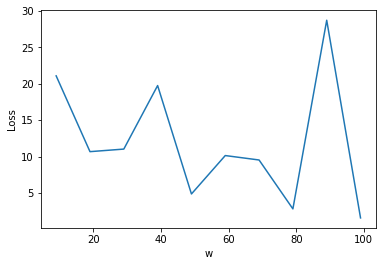

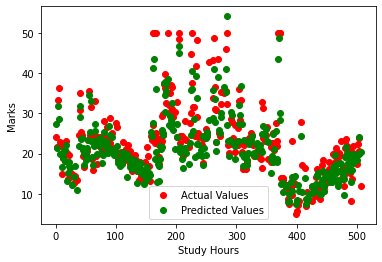

In [86]:
#print(error_list)
#print(epoch_list)

f1 = plt.figure(1)
plt.plot(epoch_list,error_list)
plt.ylabel('Loss')
plt.xlabel('w')

f2 = plt.figure(2)
plt.scatter(train_Id, targets.cpu().detach().numpy(), label ='Actual Values', color='red')
plt.scatter(train_Id, model(inputs).cpu().detach().numpy(), label ='Predicted Values', color='green')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()
#print(test_Id.shape)
#print(targets.shape)
#print(preds.shape)